<a href="https://colab.research.google.com/github/ErikaRochadeAraujo/AnaliseRiscoCredito/blob/main/AnaliseRiscoCreditoMelhorada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score


In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/ErikaRochadeAraujo/AnaliseRiscoCredito/main/credit_risk.csv')

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Deutsche Mark

In [149]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [150]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [152]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [153]:
cred = df[['default','prazo_emprestimo_meses', 'valor_emprestimo', 'taxa_comp_salario', 'anos_residencia_atual','idade', 'n_creditos_banco', 'n_dependentes']]

In [154]:
df['conta_corrente'].value_counts().unique

<bound method Series.unique of no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: conta_corrente, dtype: int64>

# Verificando agora como escalonar a conta corrente
Resolvi colocar:

2 para >= 200 DM / salary assignments for at least 1 year 

1 para 0 <= ... < 200 DM  

0 para o restante

In [155]:
cred['conta_corrente'] = [2 if i == '>= 200 DM / salary assignments for at least 1 year' else (1 if i == '0 <= ... < 200 DM' else 0) for i in df['conta_corrente']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
cred.head(3)

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,conta_corrente
0,0,6,1169,4,4,67,2,1,0
1,1,48,5951,2,2,22,1,1,1
2,0,12,2096,2,3,49,1,2,0


# Verificando os números correspondem ao esperado

In [157]:
cred['conta_corrente'].value_counts().unique

<bound method Series.unique of 0    668
1    269
2     63
Name: conta_corrente, dtype: int64>

In [158]:
df['historico_credito'].value_counts().unique

<bound method Series.unique of existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: historico_credito, dtype: int64>

# Verificando agora como escalonar a conta corrente
Resolvi colocar:

3 all credits at this bank paid back duly

3  no credits taken/ all credits paid back duly 

1 existing credits paid back duly till now

0 para o restante

In [159]:
cred['historico_credito'] = [3 if i == 'all credits at this bank paid back duly' or i == 'no credits taken/ all credits paid back duly' else (1 if i == 'existing credits paid back duly till now' else 0) for i in df['historico_credito']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
cred['historico_credito'].value_counts().unique

<bound method Series.unique of 1    530
0    381
3     89
Name: historico_credito, dtype: int64>

# aqui tenho q fazer

In [15]:
df['proposito_emprestimo'].value_counts().unique

<bound method Series.unique of domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                        9
Name: proposito_emprestimo, dtype: int64>

In [63]:
df['reserva_cc'].value_counts().unique

<bound method Series.unique of ... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: reserva_cc, dtype: int64>

Resolvi colocar:

0 para '... < 100 DM'

0 para 'unknown/ no savings account'

1 para '100 <= ... < 500 DM'

2 para '500 <= ... < 1000 DM'

3 para '.. >= 1000 DM'

In [161]:
cred['reserva_cc'] = [2 if i == '500 <= ... < 1000 DM ' 
                        else 1 if  i == '100 <= ... < 500 DM' 
                               else 0 if i == 'unknown/ no savings account' or i == '... < 100 DM' 
                                      else 3 for i in df['reserva_cc']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
cred['reserva_cc'].value_counts().unique

<bound method Series.unique of 0    786
1    103
2     63
3     48
Name: reserva_cc, dtype: int64>

In [162]:
df['tempo_emprego_atual'].value_counts().unique

<bound method Series.unique of 1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: tempo_emprego_atual, dtype: int64>

In [163]:
cred['tempo_emprego_atual'] = [0 if i == 'unemployed' 
                        else 1 if  i == '... < 1 year' 
                               else 2 if i == '1 <= ... < 4 years'
                                      else 3 for i in df['tempo_emprego_atual']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [164]:
cred['tempo_emprego_atual'].value_counts().unique

<bound method Series.unique of 3    599
2    339
0     62
Name: tempo_emprego_atual, dtype: int64>

In [22]:
df['sexo_est_civil'].value_counts().unique

<bound method Series.unique of male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: sexo_est_civil, dtype: int64>

Aqui achamos um problema nos dados coletados.
Eles separam homens por estado civil, mas colocam as mulheres todas juntas, sem que se possa entender, no caso das mulheres quem é casada/divorciada/separada. Não havendo registro de mulheres solteiras?


Então decidi separar por sexo apenas em uma nova coluna.

In [165]:
cred['sexo'] = [0 if i == 'female : divorced/separated/married' 
                        else 1 for i in df['sexo_est_civil']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
cred['sexo'].value_counts().unique

<bound method Series.unique of 1    690
0    310
Name: sexo, dtype: int64>

In [25]:
df['outros_fiadores'].value_counts().unique

<bound method Series.unique of none            907
guarantor        52
co-applicant     41
Name: outros_fiadores, dtype: int64>

# tenho duvidas aqui o que é guarantor e co-applicant 

In [166]:
cred['outros_fiadores'] = [1 if i == 'none' 
                        else 0 for i in df['outros_fiadores']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
cred['outros_fiadores'].value_counts().unique

<bound method Series.unique of 1    907
0     93
Name: outros_fiadores, dtype: int64>

In [28]:
df['propriedade'].value_counts().unique

<bound method Series.unique of if not A121/A122 : car or other, not in attribute 6                 332
real estate                                                         282
if not A121 : building society savings agreement/ life insurance    232
unknown / no property                                               154
Name: propriedade, dtype: int64>

In [167]:
cred['propriedade'] = [1 if i == 'if not A121/A122 : car or other, not in attribute 6' or i == 'if not A121 : building society savings agreement/ life insurance'
                        else 2 if  i == 'real estate' 
                               else 0 for i in df['propriedade']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
cred['propriedade'].value_counts().unique

<bound method Series.unique of 1    564
2    282
0    154
Name: propriedade, dtype: int64>

In [31]:
df['outros_planos_financiamento'].value_counts().unique

<bound method Series.unique of none      814
bank      139
stores     47
Name: outros_planos_financiamento, dtype: int64>

In [168]:
cred['outros_planos_financiamento'] = [1 if i == 'none'
                        else 0 for i in df['outros_planos_financiamento']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
cred['outros_planos_financiamento'].value_counts().unique

<bound method Series.unique of 1    814
0    186
Name: outros_planos_financiamento, dtype: int64>

In [169]:
df['status_emprego'].value_counts().unique

<bound method Series.unique of skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: status_emprego, dtype: int64>

In [170]:
cred['status_emprego'] = [3 if i == 'management/ self-employed/ highly qualified employee/ officer' 
                            else 2 if  i == 'skilled employee / official' 
                                  else 1 if i == 'unskilled - resident'
                                          else 0 for i in df['status_emprego']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
cred['status_emprego'].value_counts().unique

<bound method Series.unique of 2    630
1    200
3    148
0     22
Name: status_emprego, dtype: int64>

In [37]:
df['tipo_residencia'].value_counts().unique

<bound method Series.unique of own         713
rent        179
for free    108
Name: tipo_residencia, dtype: int64>

In [171]:
cred['tipo_residencia'] = [3 if i == 'own' 
                            else 2 if  i == 'for free' 
                                  else 1 for i in df['tipo_residencia']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
cred['tipo_residencia'].value_counts().unique

<bound method Series.unique of 3    713
1    179
2    108
Name: tipo_residencia, dtype: int64>

In [40]:
df['telefone'].value_counts().unique

<bound method Series.unique of none                                         596
yes, registered under the customers name     404
Name: telefone, dtype: int64>

In [172]:
cred['telefone'] = [0 if i == 'none' 
                            else 1 for i in df['telefone']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
cred['telefone'].value_counts().unique

<bound method Series.unique of 0    596
1    404
Name: telefone, dtype: int64>

In [75]:
df['trabalhador_estrangeiro'].value_counts().unique

<bound method Series.unique of yes    963
no      37
Name: trabalhador_estrangeiro, dtype: int64>

In [173]:
cred['trabalhador_estrangeiro'] = [0 if i == 'no' 
                            else 1 for i in df['trabalhador_estrangeiro']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
cred['trabalhador_estrangeiro'].value_counts().unique

<bound method Series.unique of 1    963
0     37
Name: trabalhador_estrangeiro, dtype: int64>

In [46]:
cred.head(3)

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,conta_corrente,historico_credito,reserva_cc,tempo_emprego_atual,sexo,outros_fiadores,propriedade,outros_planos_financiamento,status_emprego,tipo_residencia,telefone,trabalhador_estrangeiro
0,0,6,1169,4,4,67,2,1,0,0,0,3,1,1,2,1,2,3,1,1
1,1,48,5951,2,2,22,1,1,1,1,0,2,0,1,2,1,2,3,0,1
2,0,12,2096,2,3,49,1,2,0,0,0,3,1,1,2,1,1,3,0,1


In [174]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   prazo_emprestimo_meses       1000 non-null   int64
 2   valor_emprestimo             1000 non-null   int64
 3   taxa_comp_salario            1000 non-null   int64
 4   anos_residencia_atual        1000 non-null   int64
 5   idade                        1000 non-null   int64
 6   n_creditos_banco             1000 non-null   int64
 7   n_dependentes                1000 non-null   int64
 8   conta_corrente               1000 non-null   int64
 9   historico_credito            1000 non-null   int64
 10  reserva_cc                   1000 non-null   int64
 11  tempo_emprego_atual          1000 non-null   int64
 12  sexo                         1000 non-null   int64
 13  outros_fiadores              1000 non-null   int6

# Criando funções para aplicar a Classificação dos dados 

In [204]:

def get_XY(df, target):
  X = df.drop(columns=[target])
  Y = df[target]
  return X, Y

def get_train_test(X, Y, ts=0.3, rs=42):
  x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=ts,
                                                    random_state=rs,
                                                    stratify=Y
                                                    )
  return x_train, x_test, y_train, y_test


def model_apply(model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  yHat = model.predict(x_test)
  return yHat


def evaluate_model(y_test, yHat):
  acuracia = accuracy_score(y_test, yHat)
  cfmx = confusion_matrix(y_test, yHat)
  sns.heatmap(pd.DataFrame(cfmx), annot=True,fmt='g')

  print('Accuracy: ', acuracia)
  print('------------------\n')
  plt.xlabel('P R E D I C T')
  plt.ylabel('R E A L')
  plt.show()

  return cfmx


def pipeline(df, target, model):
  X, Y = get_XY(df, target)
  x_train, x_test, y_train, y_test = get_train_test(X, Y)
  yHat = model_apply(model, x_train, y_train, x_test)
  cfmx = evaluate_model(y_test, yHat)
  return cfmx


def get_tree_graph(clf, colunas, class_names):
  fig = plt.figure(figsize=(40, 25))
  _ = plot_tree(clf,
            feature_names=colunas,
            class_names=class_names,
            filled=True)




Accuracy:  0.7
------------------



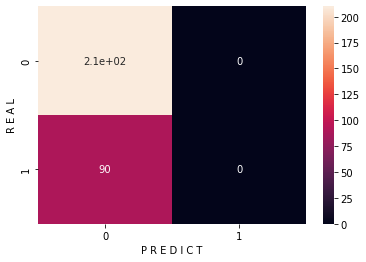

array([[210,   0],
       [ 90,   0]])

In [201]:
dummy_clf = DummyClassifier()
pipeline(cred, 'default', dummy_clf)

Accuracy:  0.6566666666666666
------------------



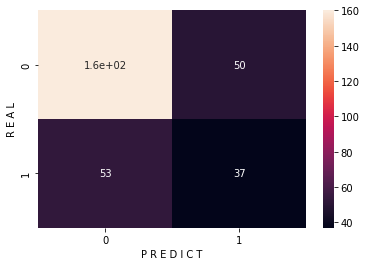

array([[160,  50],
       [ 53,  37]])

In [202]:
tree_clf = DecisionTreeClassifier()
pipeline(cred, 'default', tree_clf)

Accuracy:  0.7366666666666667
------------------



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


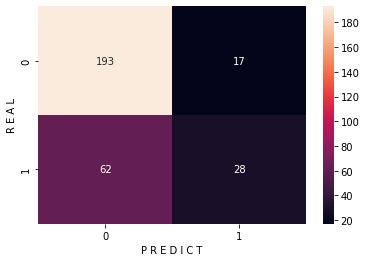

array([[193,  17],
       [ 62,  28]])

In [205]:
log_clf = LogisticRegression()
pipeline(cred, 'default', log_clf)

In [ ]:
#pipeline(cred, 'default', model)

In [206]:
colunas = cred.drop(columns='default').columns
class_names = ['Empresta', 'Não empresta']

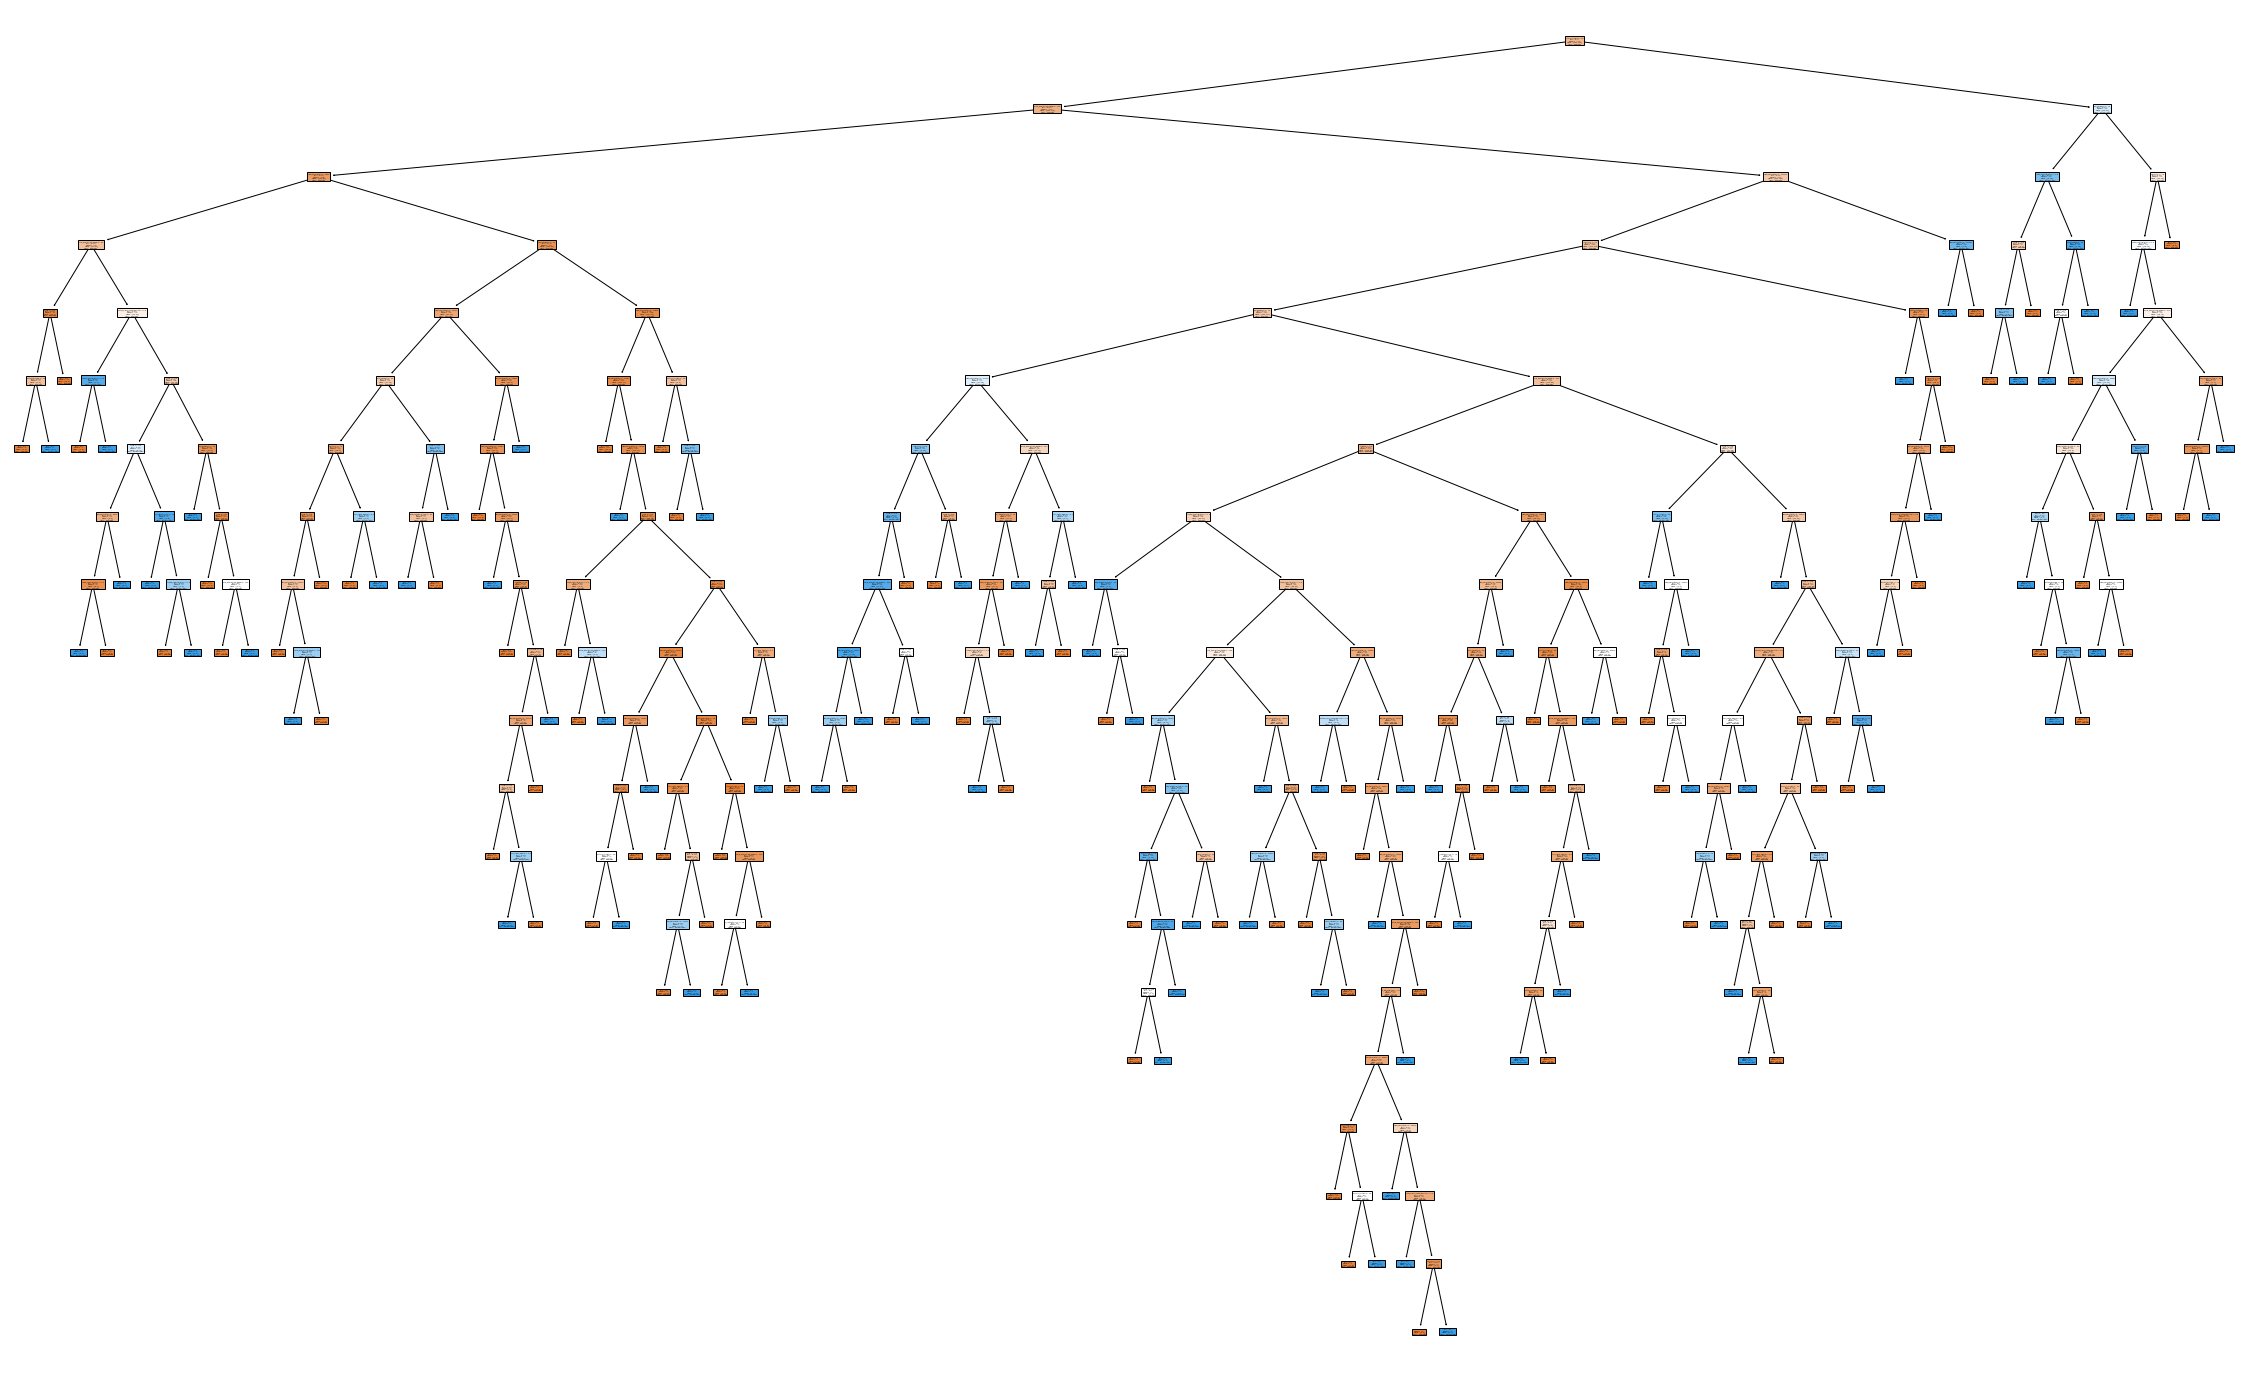

In [207]:
get_tree_graph(tree_clf, colunas, class_names)

min_samples_leaf - minimo de amostras q o nó precisa ter

Accuracy:  0.7133333333333334
------------------



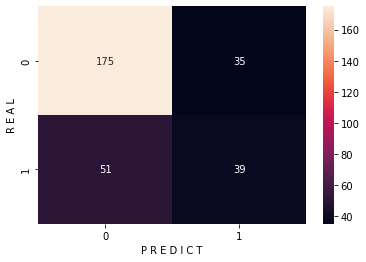

array([[175,  35],
       [ 51,  39]])

In [208]:
new_tree_clf = DecisionTreeClassifier(min_samples_leaf=10)
pipeline(cred, 'default', new_tree_clf)

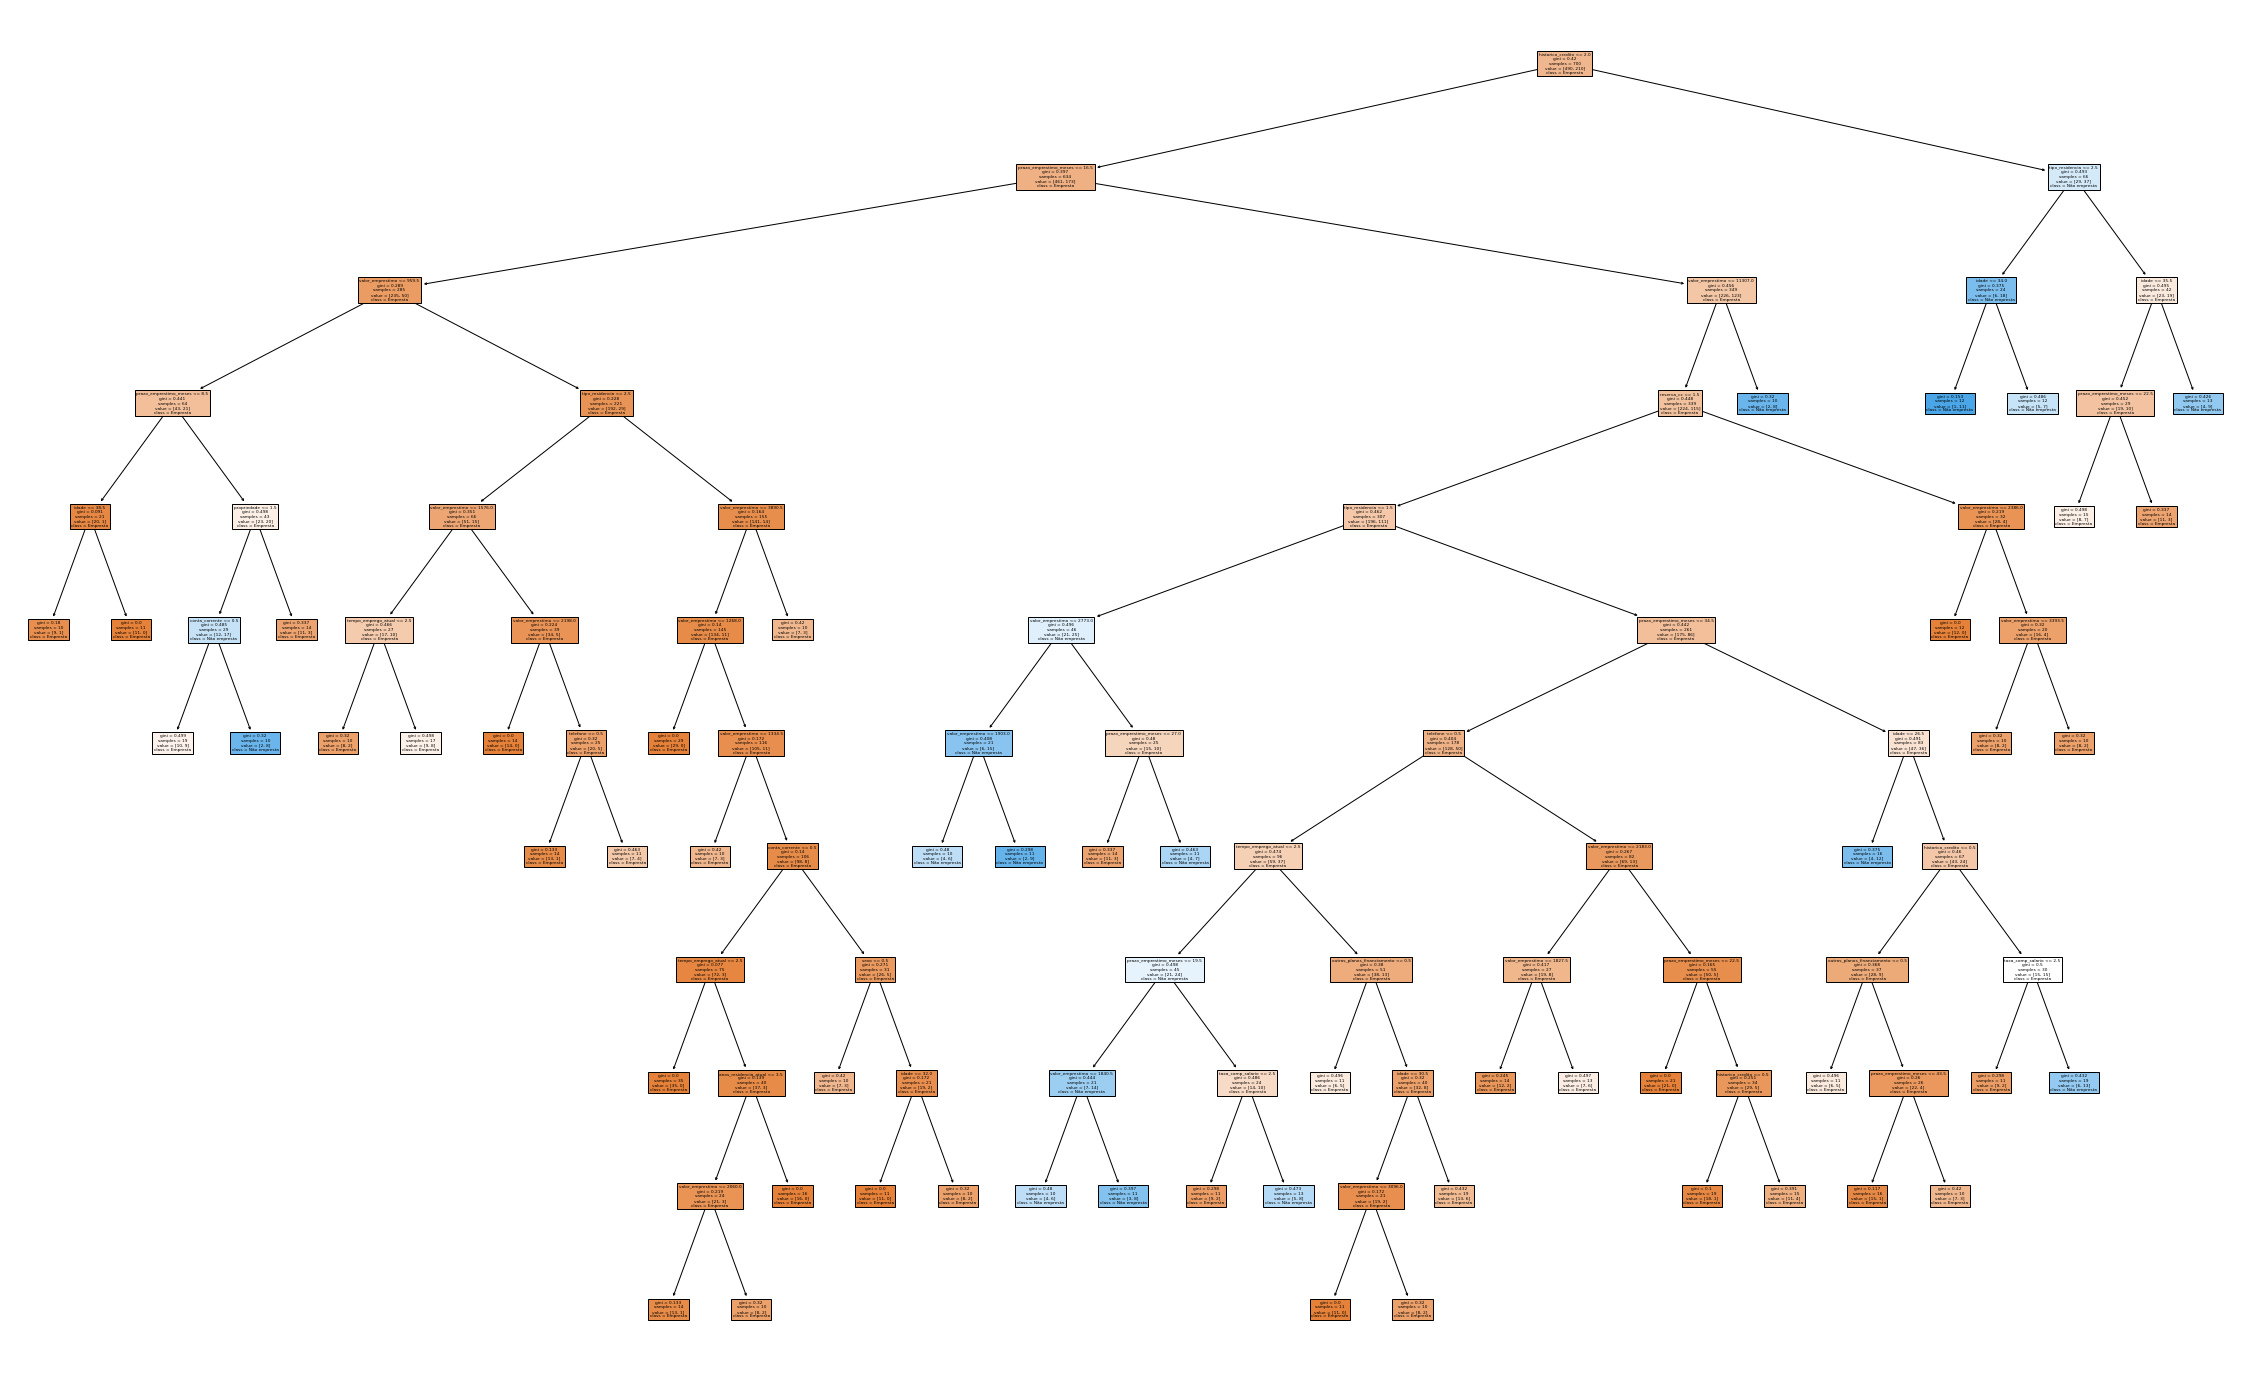

In [210]:
get_tree_graph(new_tree_clf, colunas, class_names)

Accuracy:  0.69
------------------



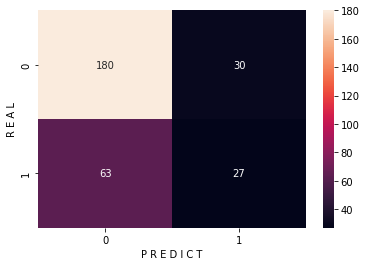

array([[180,  30],
       [ 63,  27]])

In [211]:
new_tree_clf = DecisionTreeClassifier(min_samples_leaf=10, criterion='entropy')
pipeline(cred, 'default', new_tree_clf)

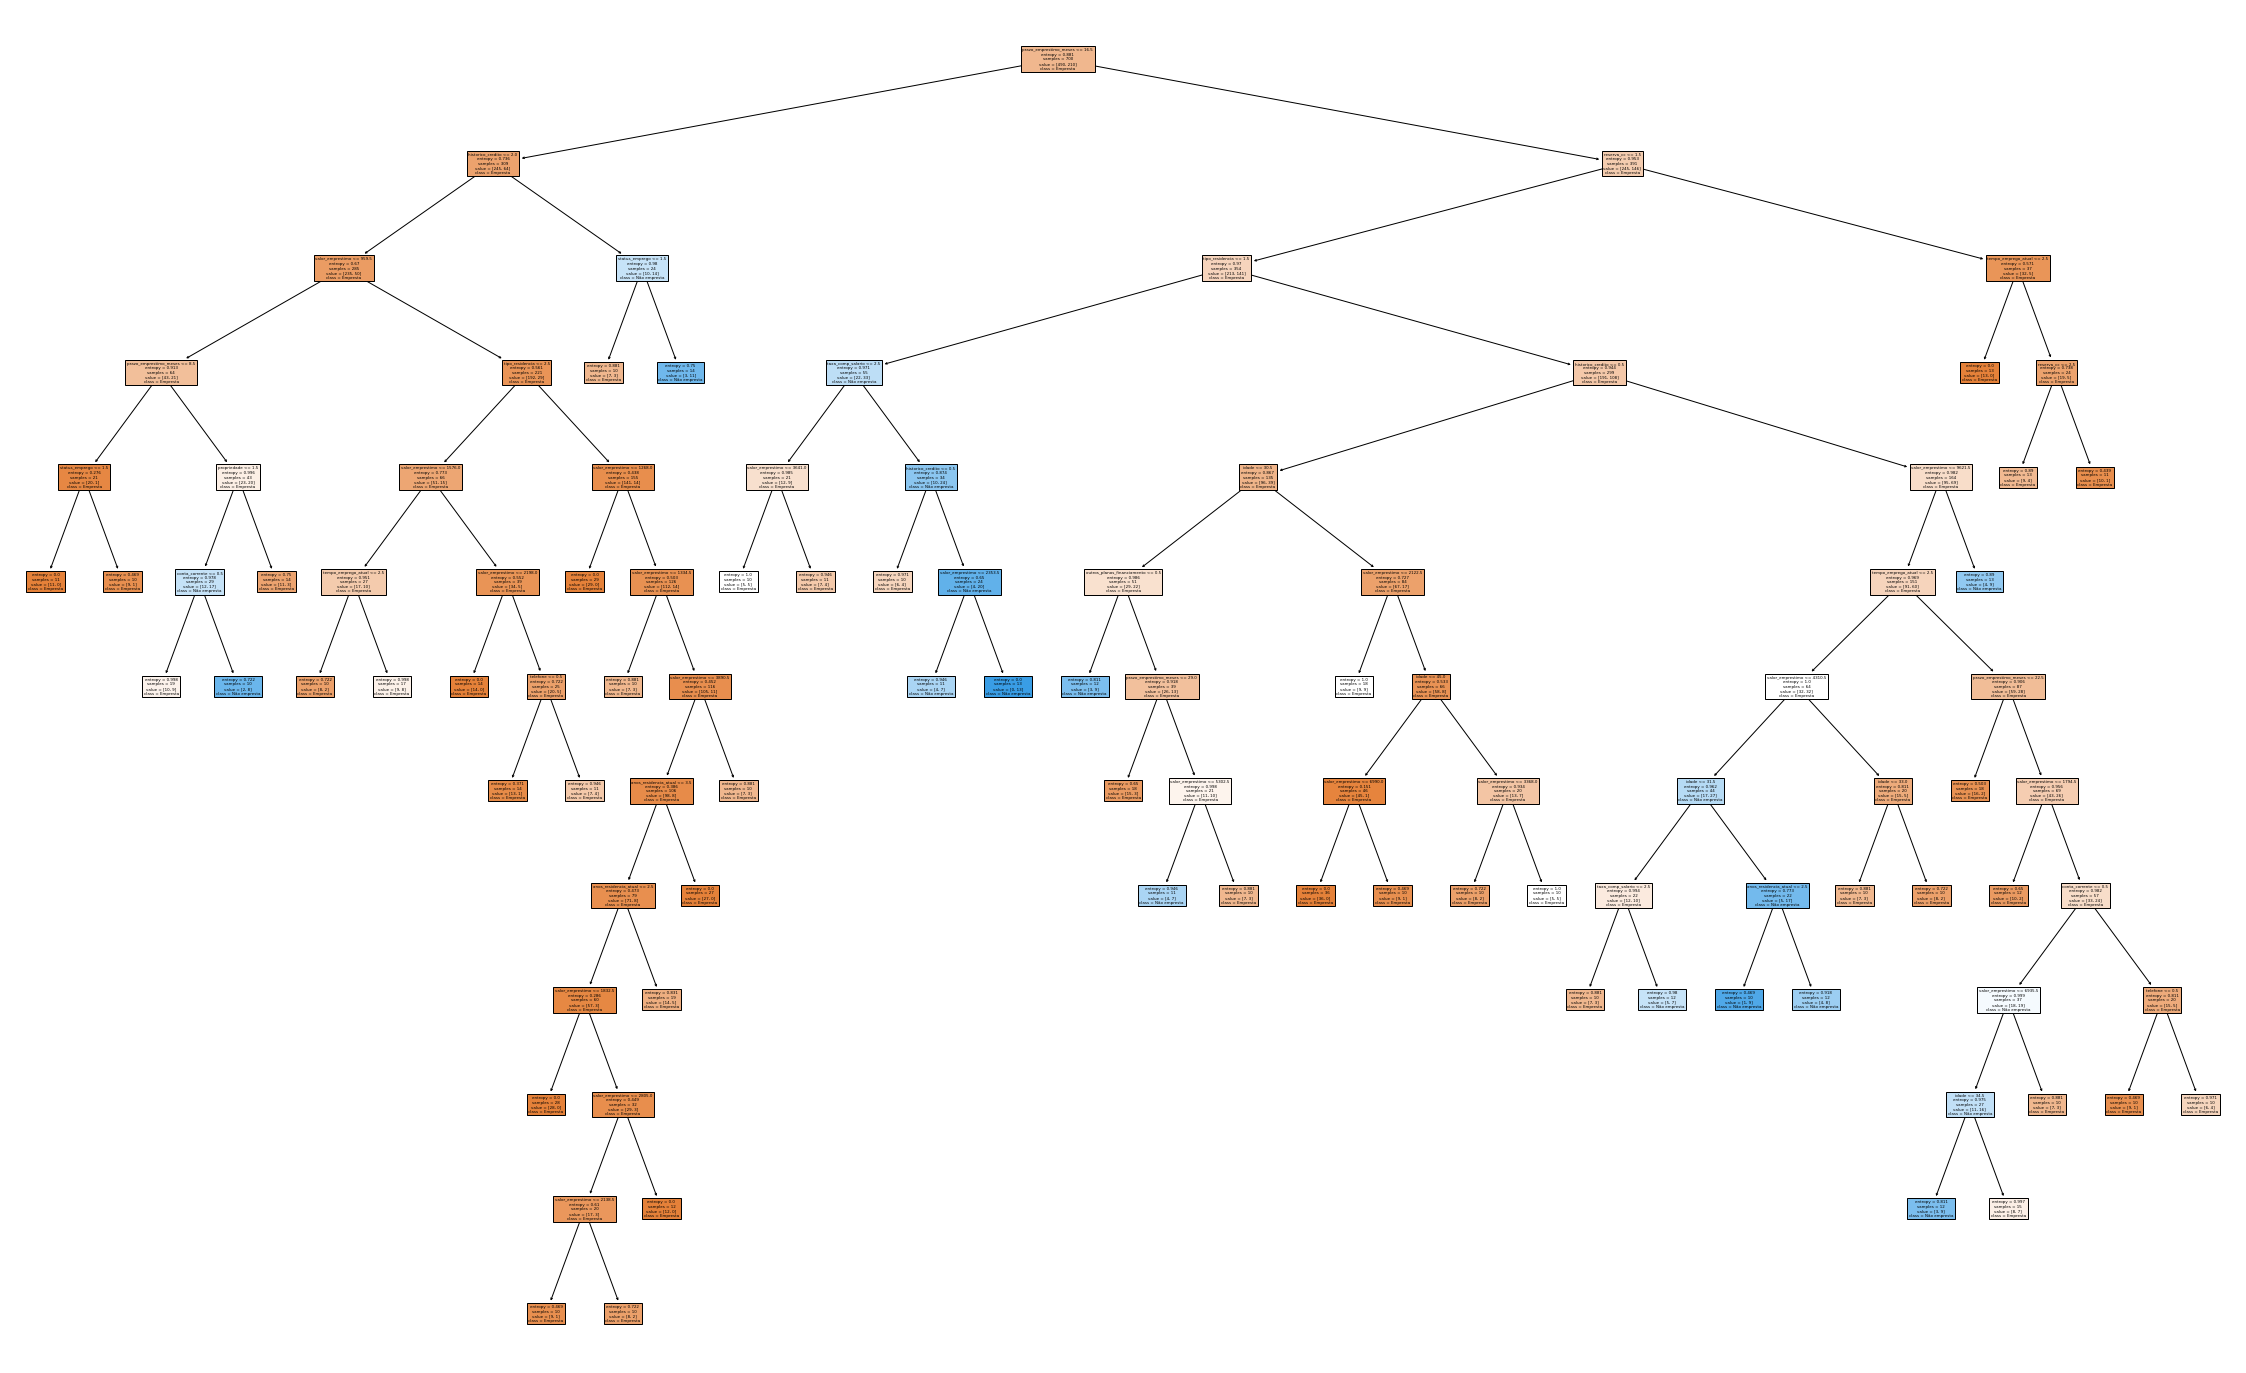

In [213]:
get_tree_graph(new_tree_clf, colunas, class_names)

Accuracy:  0.71
------------------



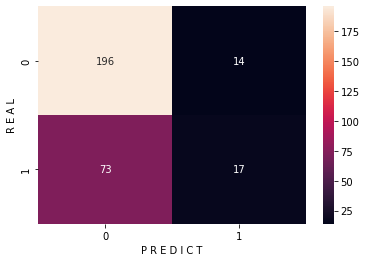

array([[196,  14],
       [ 73,  17]])

In [214]:
new_tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='entropy')
pipeline(cred, 'default', new_tree_clf)

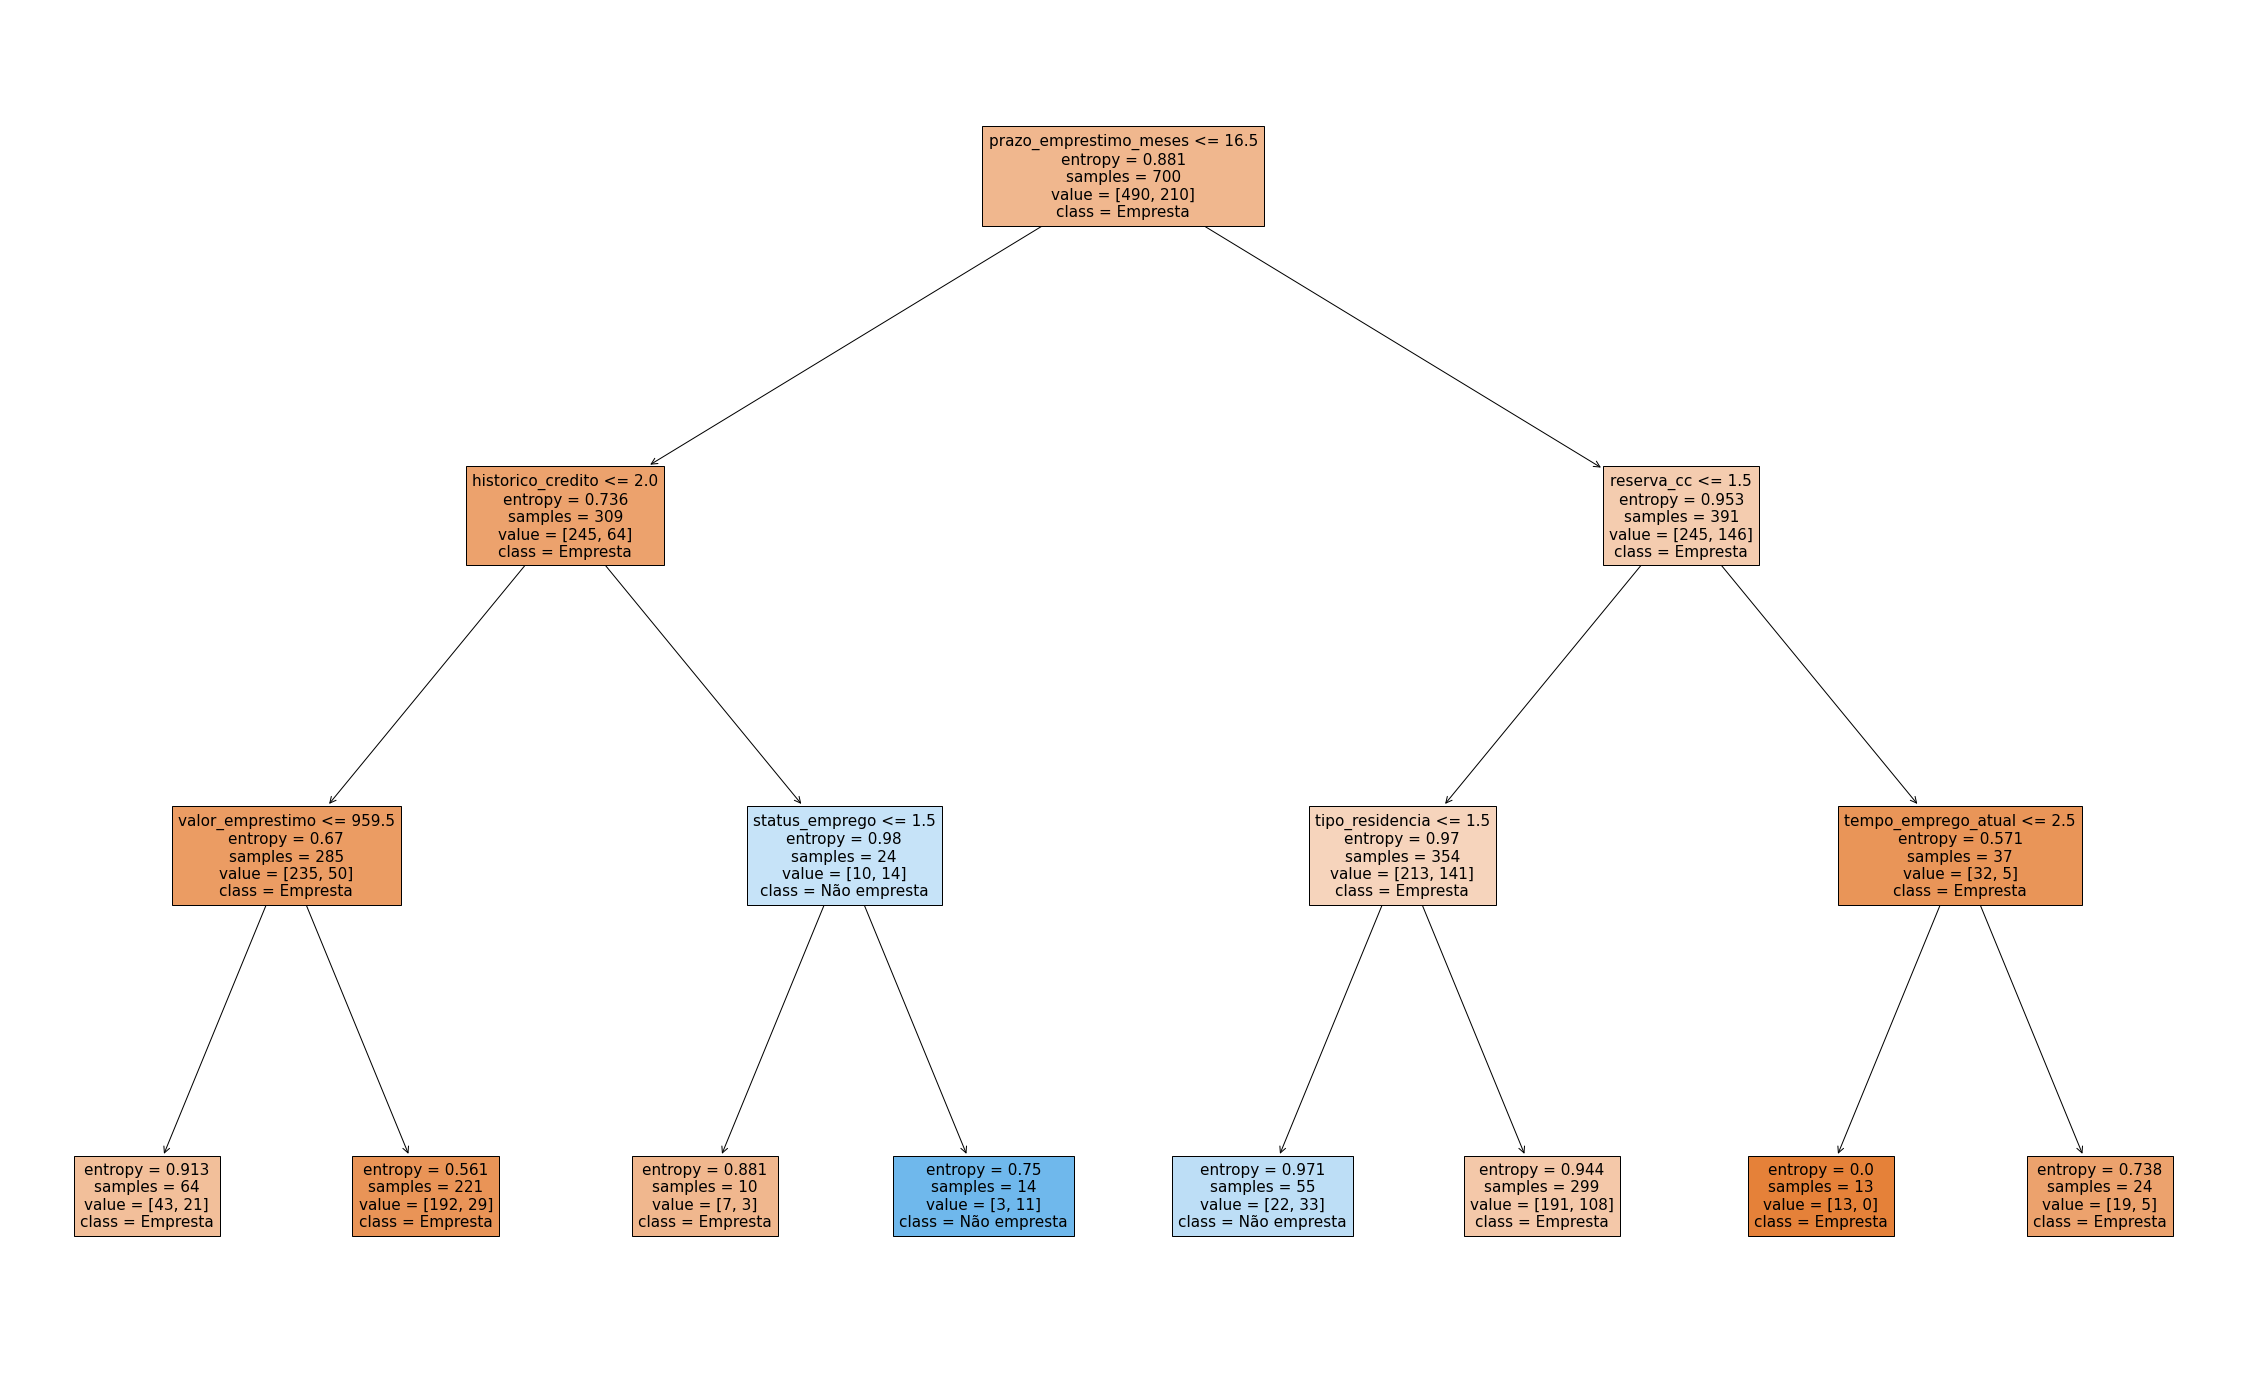

In [215]:
get_tree_graph(new_tree_clf, colunas, class_names)

In [216]:
dt = DecisionTreeClassifier()

In [230]:
params = {
    'max_depth': [20, 40, 60, 80], 
    'min_samples_leaf': [5, 10, 20, 30, 40], 
    'criterion': ['entropy', 'gini']
}

In [231]:
grd_tree = GridSearchCV(estimator=dt,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [232]:
X, Y = get_XY(cred, 'default')
x_train, x_test, y_train, y_test = get_train_test(X, Y)

In [233]:
grd_tree.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [20, 40, 60, 80],
                         'min_samples_leaf': [5, 10, 20, 30, 40]},
             scoring='recall')

In [234]:
grd_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_leaf=5)

Accuracy:  0.69
------------------



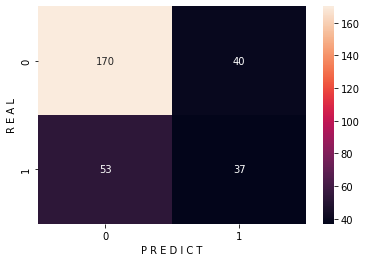

In [235]:
new_tree_clf = grd_tree.best_estimator_
cfmx = pipeline(cred, 'default', new_tree_clf)

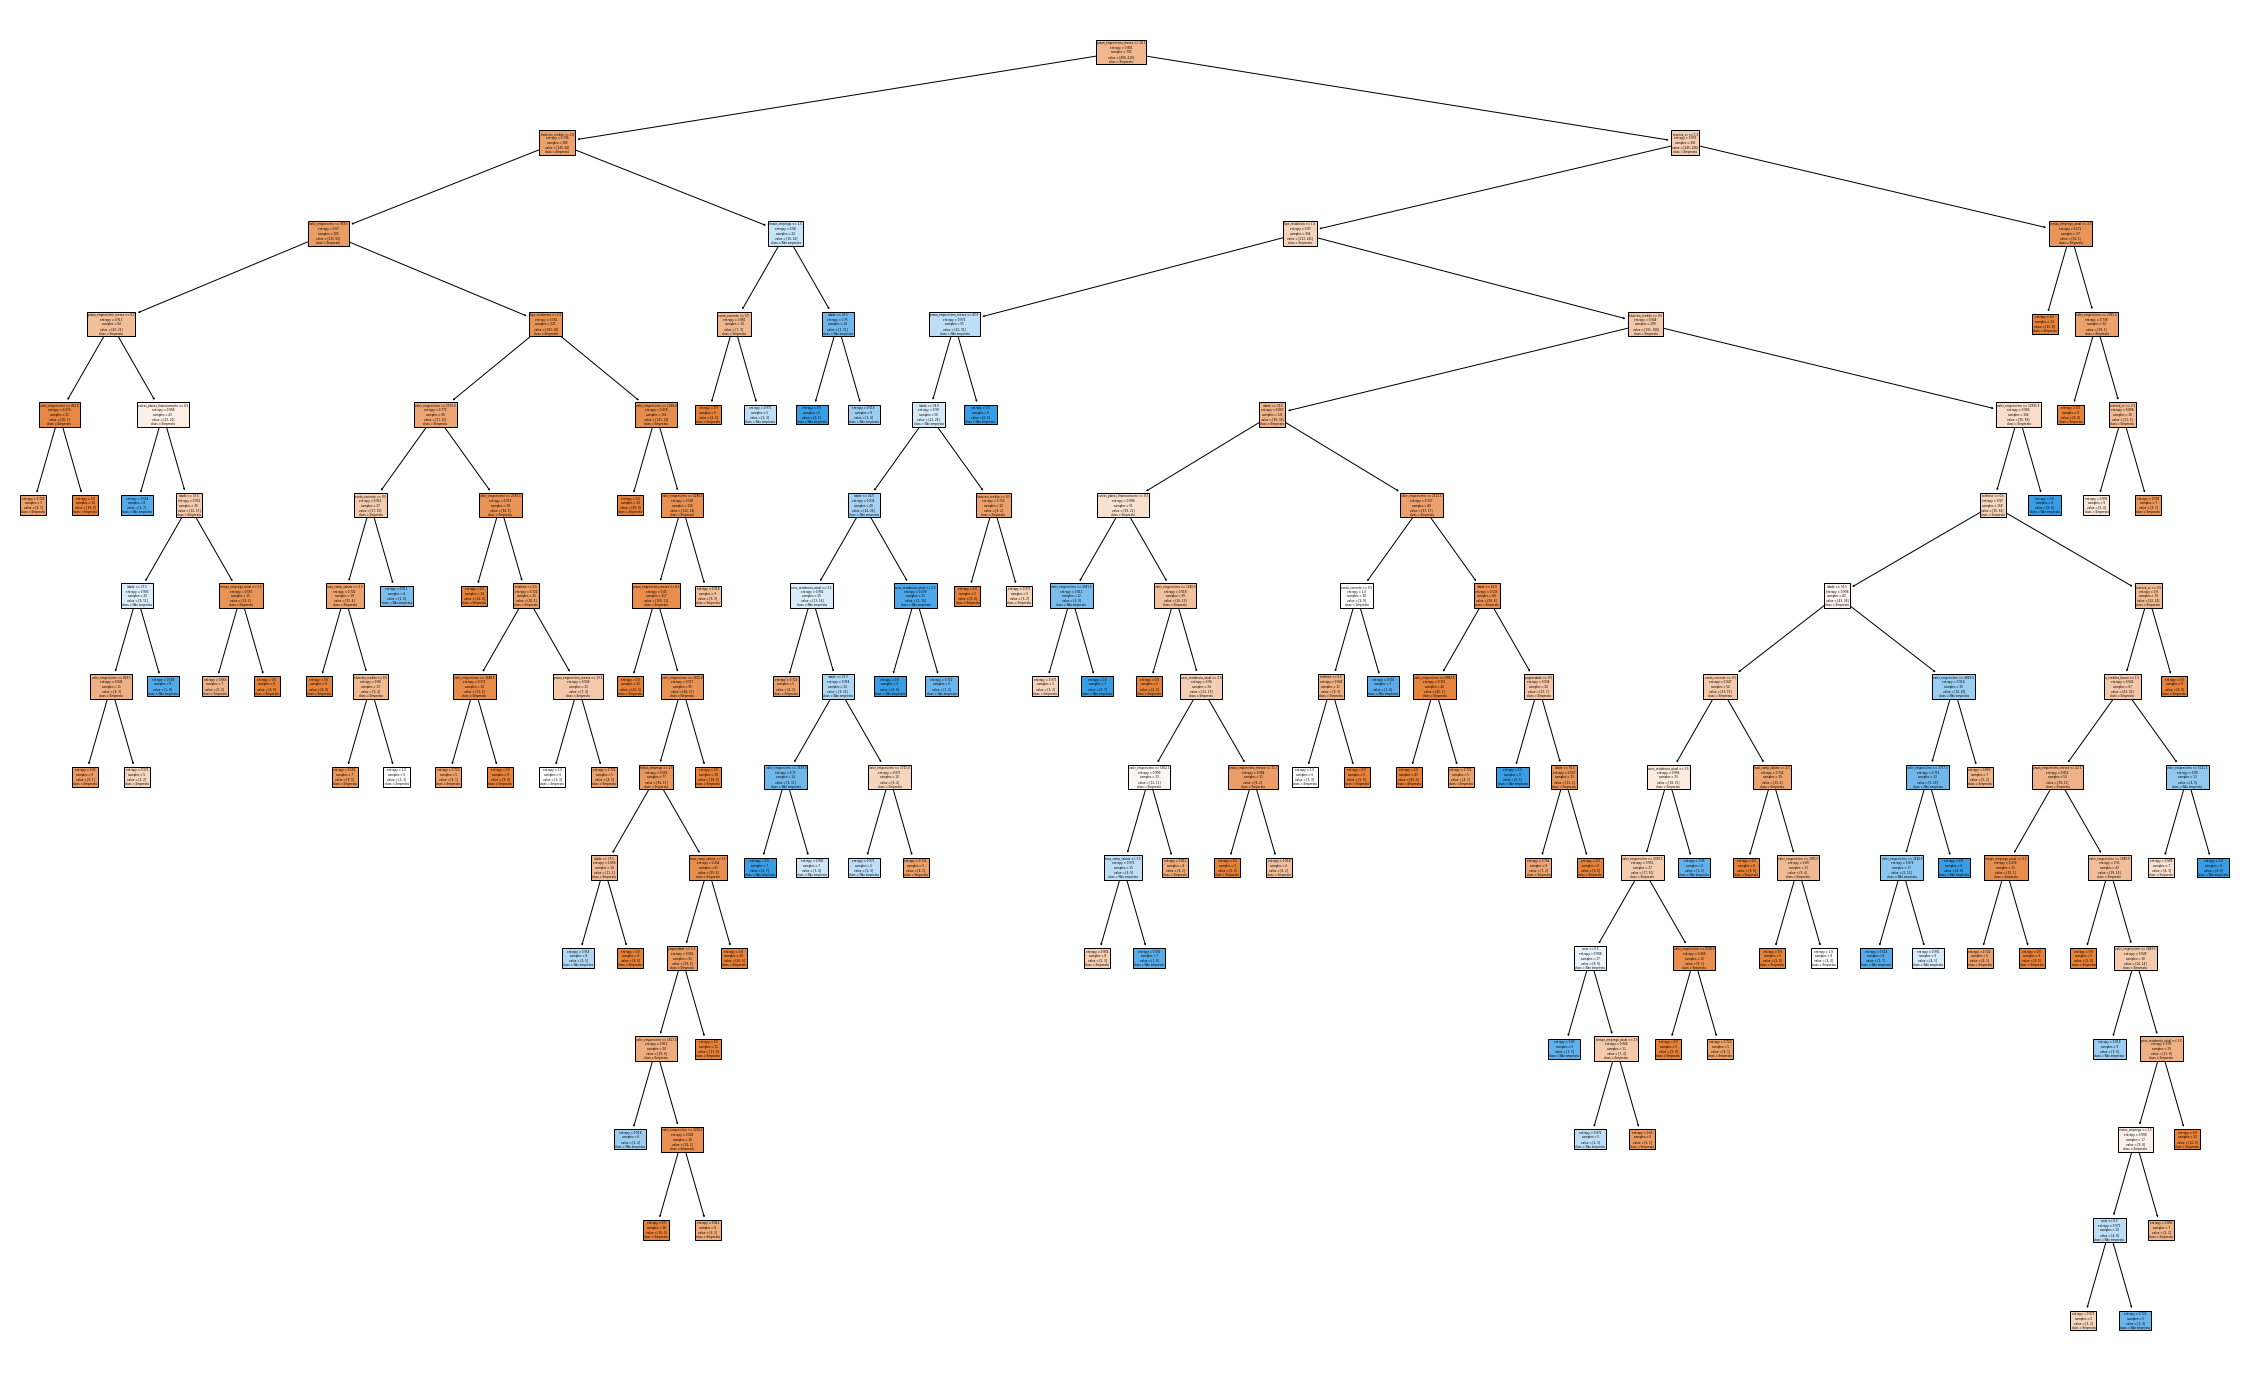

In [236]:
get_tree_graph(new_tree_clf, colunas, class_names)

# Métricas 
## Acurácia de falsos positivos e verdadeiros positivos (roc_auc_score)
## Acurácia simples
## Precisão
## Sensibilidade (Recall)


In [242]:
yhat_prob = log_clf.predict_proba(x_test)[:,1]
yhat = log_clf.predict(x_test)

In [243]:
def metricas(y_test, yhat_prob, yhat):
  #x_train, x_test, y_train, y_test = get_train_test(X, Y, ts=0.3, rs=42)
  rauc = roc_auc_score(y_test, yhat_prob)  * 100
  print('Acurácia de falsos positivos e verdadeiros positivos: ', rauc)
  auc = (accuracy_score(y_test, yhat) * 100)
  print('Acurácia: ', auc)
  print(classification_report(y_test, yhat))



In [244]:
metricas(y_test, yhat_prob, yhat)

Acurácia de falsos positivos e verdadeiros positivos:  70.51851851851852
Acurácia:  73.66666666666667
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       210
           1       0.62      0.31      0.41        90

    accuracy                           0.74       300
   macro avg       0.69      0.62      0.62       300
weighted avg       0.72      0.74      0.71       300



In [69]:
print(metrics.classification_report(y_test, yhat))

NameError: ignored

# aqui ainda estou escrevendo
# Validação cruzada

A ideia é dividir a massa de dados disponível em k partições (os tais "folds") e realizar k rodadas de treinamento e teste com essas combinações de dados.
 Assim, idealmente minimiza-se as chances de algum dado importante para a classificação ser deixado de fora durante o treinamento.


 Vms fazer uma função disso para deixar prático esse trabalho quando for preciso usar novamente.

In [246]:
def cross_validation(log_clf, cv_fold):
  x_train, x_test, y_train, y_test = get_train_test(X, Y, ts=0.3, rs=42)
  #cv_fold = StratifiedKFold(n_splits=10)
  cv_logistic = cross_val_score(log_clf, x_train, y_train, cv=cv_fold, scoring='accuracy')
  return cv_logistic
  


In [245]:
def compara_metrica(y_test, yhat, cv_logistic):
  acc = accuracy_score(y_test, yhat) * 100
  acc_cv = cv_logistic.mean()
  print(f'A acurácia do modelo é {acc} e a acurácia cross validada é {acc_cv}')

In [ ]:
acc = metrics.accuracy_score(y_test, yhat) * 100

In [247]:
cv_fold = StratifiedKFold(n_splits=10)

In [248]:
cv_logistic = cross_validation(log_clf, cv_fold)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [249]:
cv_logistic.mean()

0.7128571428571429

In [250]:
compara_metrica(y_test, yhat, cv_logistic)

A acurácia do modelo é 73.66666666666667 e a acurácia cross validada é 0.7128571428571429


# Grid Search

In [251]:
params = {
    'max_iter': [50, 100, 500],
    'penalty': ['l1', 'l2']
}
logistic = LogisticRegression()
logict_cv = GridSearchCV(logistic, params, cv=10)
logict_cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 500], 'penalty': ['l1', 'l2']})

In [252]:
logict_cv.best_score_


0.7128571428571429

In [253]:
logict_cv.best_params_

{'max_iter': 100, 'penalty': 'l2'}

In [254]:
yhat = logict_cv.predict(x_test)

In [255]:
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])